<a href="https://colab.research.google.com/github/JuliandaO34/ML-STUDENTS/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: CARGUE UN DATAFRAME que se llama proyecto_limpio.csv separado por ;

import pandas as pd

df = pd.read_csv('Original_limpio.csv', sep=';')
df.head()

,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mothers qualification,Fathers qualification,Mothers occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,5,1,10,1,0,78,0,0,2,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
1,7,2,14,1,0,28,0,22,26,5,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
2,0,3,9,1,0,48,14,0,0,9,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,2
3,0,1,9,1,0,49,0,0,13,4,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,0
4,0,1,13,1,0,52,0,22,13,5,...,0,6,7,5,14.200000,0,13.9,-0.3,0.79,2


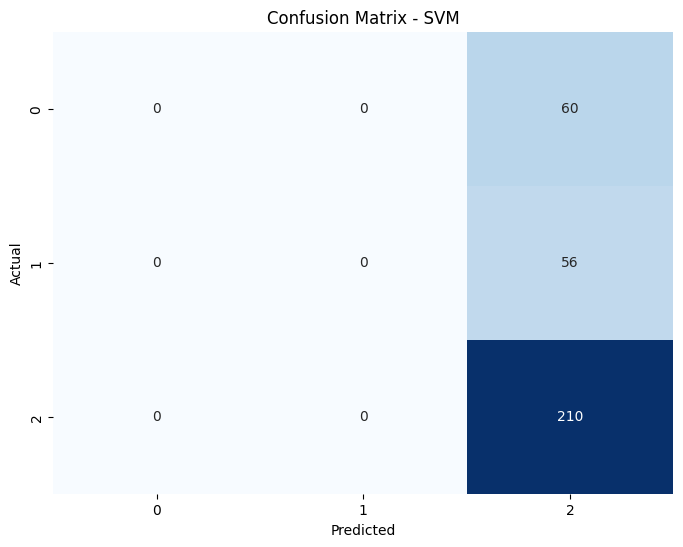

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.00      0.00      0.00        56
           2       0.64      1.00      0.78       210

    accuracy                           0.64       326
   macro avg       0.21      0.33      0.26       326
weighted avg       0.41      0.64      0.50       326



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Separar características (X) y variable objetivo (y)
X = df.drop('Target', axis=1)
y = df['Target']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Inicializar y entrenar el clasificador SVM (puedes ajustar el kernel)
svm = SVC(kernel='rbf', C=1, gamma='scale')  # También puedes usar 'linear' o 'poly'
svm.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_pred = svm.predict(X_test)

# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=svm.classes_, yticklabels=svm.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

# Reporte de métricas de evaluación
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


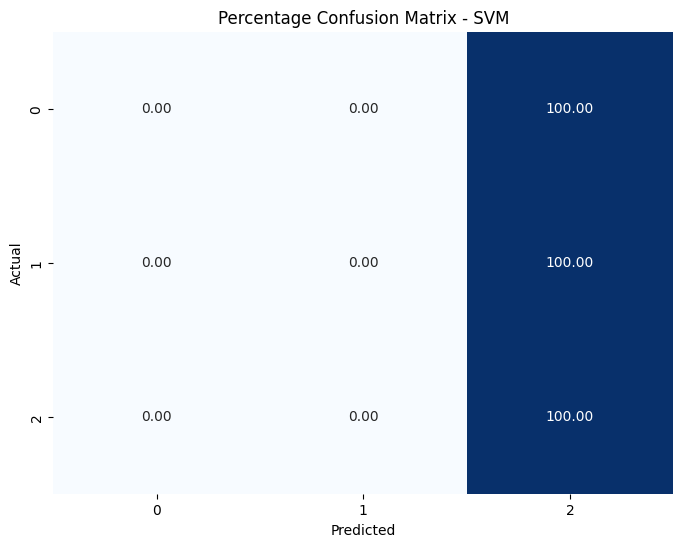

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calcular la matriz de confusión en porcentaje
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Graficar la matriz de confusión en porcentaje
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Blues', cbar=False,
            xticklabels=svm.classes_, yticklabels=svm.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Percentage Confusion Matrix - SVM')
plt.show()


In [ ]:
# prompt: crea un unos ciclos para jugar con los tipos de kernels disponibles, por cada iteracion necesito el macro avg f1

kernels = ['linear', 'poly', 'rbf']
macro_avg_f1_scores = {}

for kernel_type in kernels:
    print(f"Training SVM with kernel: {kernel_type}")
    svm = SVC(kernel=kernel_type, C=1, gamma='scale')
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    # Reporte de métricas de evaluación
    report = classification_report(y_test, y_pred, output_dict=True)
    macro_avg_f1 = report['macro avg']['f1-score']
    macro_avg_f1_scores[kernel_type] = macro_avg_f1
    print(f"Macro Avg F1-score for {kernel_type} kernel: {macro_avg_f1}\n")

print("Macro Avg F1-scores for different kernels:")
for kernel, f1 in macro_avg_f1_scores.items():
    print(f"{kernel}: {f1}")

Training SVM with kernel: linear
Macro Avg F1-score for linear kernel: 0.6010730122688295

Training SVM with kernel: poly
Macro Avg F1-score for poly kernel: 0.2611940298507463

Training SVM with kernel: rbf
Macro Avg F1-score for rbf kernel: 0.2611940298507463

Macro Avg F1-scores for different kernels:
linear: 0.6010730122688295
poly: 0.2611940298507463
rbf: 0.2611940298507463


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m